<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/27_stl_iqr_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STL + IQR + 이상치 표시

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

# ----------------------------
# 1. 데이터 직접 삽입 (날짜는 ','로 구분)
# ----------------------------
raw_data = """
Date,Total
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
1986-06-01,8951
1986-07-01,9668
1986-08-01,10188
1986-09-01,9896
1986-10-01,10649
1986-11-01,8917
1986-12-01,8196
1987-01-01,10768
1987-02-01,12220
1987-03-01,14463
1987-04-01,12944
1987-05-01,11001
1987-06-01,11000
1987-07-01,11876
1987-08-01,13021
1987-09-01,13494
1987-10-01,14041
1987-11-01,11312
1987-12-01,10362
1988-01-01,12533
1988-02-01,14343
1988-03-01,14676
1988-04-01,12253
1988-05-01,11840
1988-06-01,12018
1988-07-01,11819
1988-08-01,12453
1988-09-01,12309
1988-10-01,13005
1988-11-01,11815
1988-12-01,10496
1989-01-01,13996
1989-02-01,15158
1989-03-01,15587
1989-04-01,14615
1989-05-01,14792
1989-06-01,14373
1989-07-01,14573
1989-08-01,14385
1989-09-01,15607
1989-10-01,15978
1989-11-01,14436
1989-12-01,12794
1990-01-01,15771
1990-02-01,16476
1990-03-01,16420
1990-04-01,15444
1990-05-01,16118
1990-06-01,15158
1990-07-01,15214
1990-08-01,16257
1990-09-01,15287
1990-10-01,15212
1990-11-01,13488
1990-12-01,12300
1991-01-01,15794
1991-02-01,17113
1991-03-01,17536
1991-04-01,15914
1991-05-01,16716
1991-06-01,15983
1991-07-01,16878
1991-08-01,17893
1991-09-01,16697
1991-10-01,18546
1991-11-01,15486
1991-12-01,15253
1992-01-01,18698
1992-02-01,	21100
1992-03-01,	22425
1992-04-01,	19923
1992-05-01,19454
1992-06-01,	18874
1992-07-01,	19676
1992-08-01,	19559
1992-09-01,	19500
1992-10-01,	19615
1992-11-01,	16814
1992-12-01,	15698
1993-01-01,	20273
1993-02-01,	20774
1993-03-01,	21309
1993-04-01,	19377
1993-05-01,	19211
1993-06-01,	19103
1993-07-01,	20086
1993-08-01,	19758
1993-09-01,	19162
1993-10-01,	19371
1993-11-01,	17709
1993-12-01,	17342
1994-01-01,	18772
1994-02-01,	19363
1994-03-01,	20001
1994-04-01,17112
1994-05-01,	18027
1994-06-01,	17173
1994-07-01,	18024
1994-08-01,	18983
1994-09-01,	17983
1994-10-01,	19151
1994-11-01,	16427
1994-12-01,	15461
1995-01-01,	19191
1995-02-01,	20008
1995-03-01,	21702
1995-04-01,	18649
1995-05-01,	19169
1995-06-01,	18631
1995-07-01,	18157
1995-08-01,	20187
1995-09-01,	18660
1995-10-01,	19920
1995-11-01,	16680
1995-12-01,	16018
1996-01-01,	20322
1996-02-01,	20613
1996-03-01,	22704
1996-04-01,	20276
1996-05-01,	20669
1996-06-01,	18074
1996-07-01,	18719
1996-08-01,	20217
1996-09-01,	19642
1996-10-01,	20842
1996-11-01,	18204
1996-12-01,	16898
1997-01-01,	20746
1997-02-01,	23058
1997-03-01,	24624
1997-04-01,	22154
1997-05-01,	22444
1997-06-01,	21471
1997-07-01,	21866
1997-08-01,	22548
1997-09-01,	21518
1997-10-01,	23408
1997-11-01,	19645
1997-12-01,	18278
1998-01-01,	23576
1998-02-01,	26650
1998-03-01,	26207
1998-04-01,	23195
1998-05-01,	22960
1998-06-01,	23002
1998-07-01,	22973
1998-08-01,	24089
1998-09-01,	22805
1998-10-01,	23241
1998-11-01,	21581
1998-12-01,	21119
1999-01-01,	23107
1999-02-01,	25780
1999-03-01,	28544
1999-04-01,	23488
1999-05-01,	23964
1999-06-01,	23720
1999-07-01,	25069
1999-08-01,	24618
1999-09-01,	24430
1999-10-01,	25229
1999-11-01,	22344
1999-12-01,	22372
2000-01-01,	25412
2000-02-01,	25354
2000-03-01,	29161
2000-04-01,	24924
2000-05-01,	24763
2000-06-01,	25342
2000-07-01,	24911
2000-08-01,	25847
2000-09-01,	23743
2000-10-01,	25036
2000-11-01,	21911
2000-12-01,	20752
2001-01-01,	24507
2001-02-01,	25968
2001-03-01,	28752
2001-04-01,	25167
2001-05-01,	24728
2001-06-01,	23690
2001-07-01,	24816
2001-08-01,	26004
2001-09-01,	24210
2001-10-01,	25083
2001-11-01,	21807
2001-12-01,	21635
2002-01-01,	27173
2002-02-01,	29308
2002-03-01,	28645
2002-04-01,	25023
2002-05-01,	27261
2002-06-01,	24670
2002-07-01,	26441
2002-08-01,	27961
2002-09-01,	26498
2002-10-01,	27800
2002-11-01,	23939
2002-12-01,	22930
2003-01-01,	27584
2003-02-01,	27586
2003-03-01,	30485
2003-04-01,	26135
2003-05-01,	27370
2003-06-01,	25487
2003-07-01,	26427
2003-08-01,	27672
2003-09-01,	26853
2003-10-01,	27875
2003-11-01,	23416
2003-12-01,	22482
2004-01-01,	27140
2004-02-01,	28526
2004-03-01,	28845
2004-04-01,	25033
2004-05-01,	24764
2004-06-01,	24896
2004-07-01,	24623
2004-08-01,	26538
2004-09-01,	24674
2004-10-01,	25863
2004-11-01,	23156
2004-12-01,	22721
2005-01-01,	26204
2005-02-01,	26526
2005-03-01,	27473
2005-04-01,	24536
2005-05-01,	25764
2005-06-01,	25154
2005-07-01,	23729
2005-08-01,	25336
2005-09-01,	24649
2005-10-01,	25904
2005-11-01,	22868
2005-12-01,	21825
2006-01-01,	26955
2006-02-01,	27349
2006-03-01,	29367
2006-04-01,	24071
2006-05-01,	23173
2006-06-01,	21740
2006-07-01,	22056
2006-08-01,	23923
2006-09-01,	22189
2006-10-01,	22458
2006-11-01,	19476
2006-12-01,	21056
2007-01-01,	22842
2007-02-01,	22943
2007-03-01,	23445
2007-04-01,	19176
2007-05-01,	22058
2007-06-01,	19451
2007-07-01,	20378
2007-08-01,	21778
2007-09-01,	20431
2007-10-01,	22486
2007-11-01,	18889
2007-12-01,	18574
2008-01-01,	24658
2008-02-01,	24997
2008-03-01,	23987
2008-04-01,	21199
2008-05-01,	21205
2008-06-01,	21553
2008-07-01,	21166
2008-08-01, 20720
2008-09-01,	18067
2008-10-01,	21121
2008-11-01,	16617
2008-12-01,	15917
2009-01-01,	19262
2009-02-01,	20658
2009-03-01,	22660
2009-04-01,	20147
2009-05-01,	18818
2009-06-01,	19017
2009-07-01,	19451
2009-08-01,	18502
2009-09-01,	18893
2009-10-01,	19480
2009-11-01,	15743
2009-12-01,	16554
2010-01-01,	19465
2010-02-01,	22617
2010-03-01,	22438
2010-04-01,	18511
2010-05-01,	19142
2010-06-01,	19063
2010-07-01,	18006
2010-08-01,	20386
2010-09-01,	20280
2010-10-01,	18894
2010-11-01,	15941
2010-12-01,	16851
2011-01-01,	18204
2011-02-01,	15564
2011-03-01,	17984
2011-04-01,	13979
2011-05-01,	12591
2011-06-01,	12408
2011-07-01,	12779
2011-08-01,	14233
2011-09-01,	13410
2011-10-01,	12893
2011-11-01,	11843
2011-12-01,	11321
2012-01-01,	13427
2012-02-01,	14447
2012-03-01,	14717
2012-04-01,	11998
2012-05-01,	13379
2012-06-01,	12463
2012-07-01,	13276
2012-08-01,	14442
2012-09-01,	13422
2012-10-01,	13795
2012-11-01,	13352
2012-12-01,	12716
"""


STL 분해

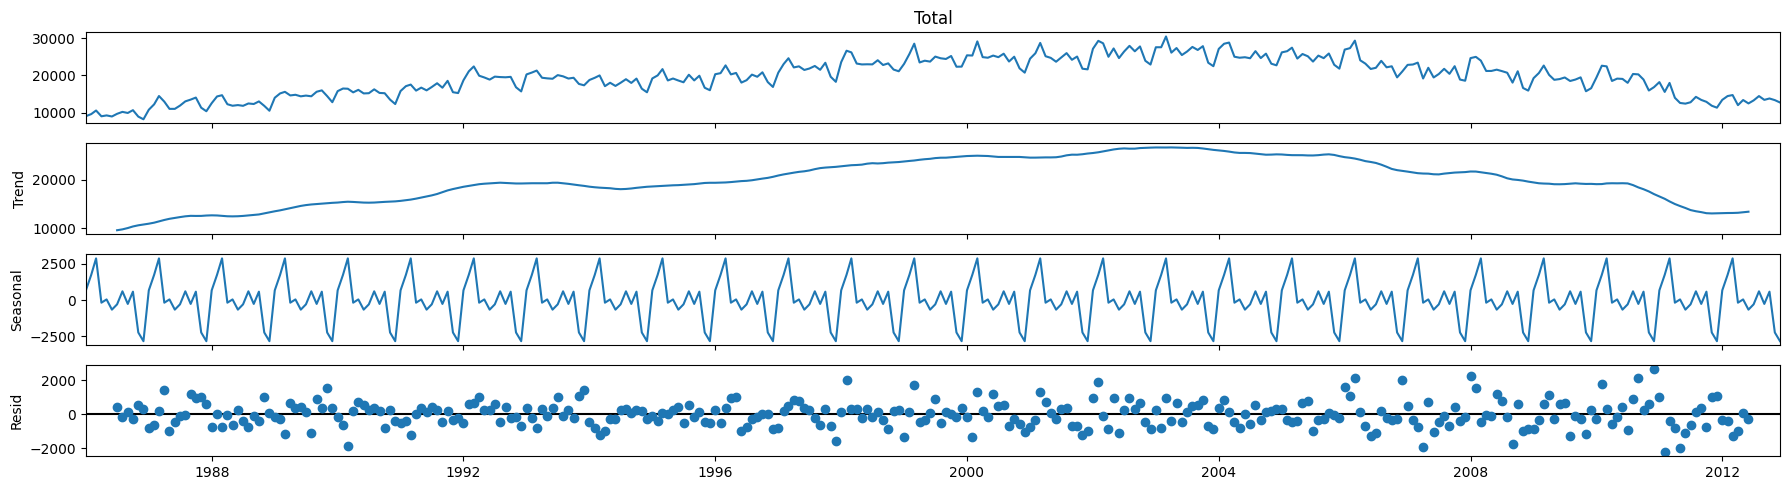

In [2]:
from io import StringIO
df = pd.read_csv(StringIO(raw_data))
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# ----------------------------
# 2. STL 분해
# ----------------------------
result = seasonal_decompose(df['Total'], model='additive', period=12)
resid = result.resid.dropna()
x = resid.index
y = resid.values

# STL 분해 결과 시각화
fig1 = result.plot()
fig1.set_size_inches(18, 5)  # 가로 사이즈 통일
plt.tight_layout()
plt.show()


IQR 방식 이상치 탐지

In [3]:
# ----------------------------
# 3. IQR 방식 이상치 탐지
# ----------------------------
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

잔차 그래프 + 이상치 표시

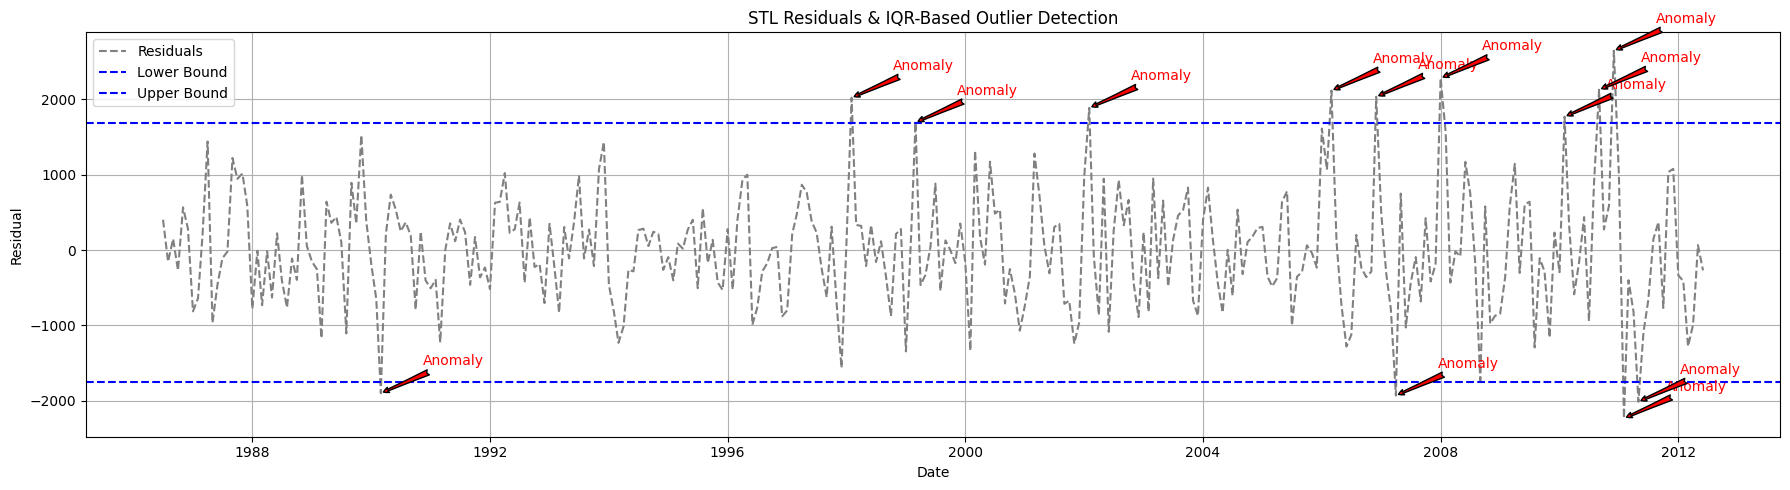

In [7]:
# ----------------------------
# 4. 잔차 그래프 + 이상치 표시
# ----------------------------
plt.figure(figsize=(18, 5))
plt.plot(x, y, label='Residuals', linestyle='--', color='gray')
plt.axhline(y=lower, color='blue', linestyle='--', label='Lower Bound')
plt.axhline(y=upper, color='blue', linestyle='--', label='Upper Bound')

for i in range(len(y)):
    if y[i] < lower or y[i] > upper:
        plt.annotate(
            'Anomaly',
            (mdates.date2num(x[i]), y[i]),
            xytext=(30, 20),
            textcoords='offset points',
            color='red',
            arrowprops=dict(facecolor='red', arrowstyle='fancy')
        )

plt.title("STL Residuals & IQR-Based Outlier Detection")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

원 시계열에서 이상치 주석 추가

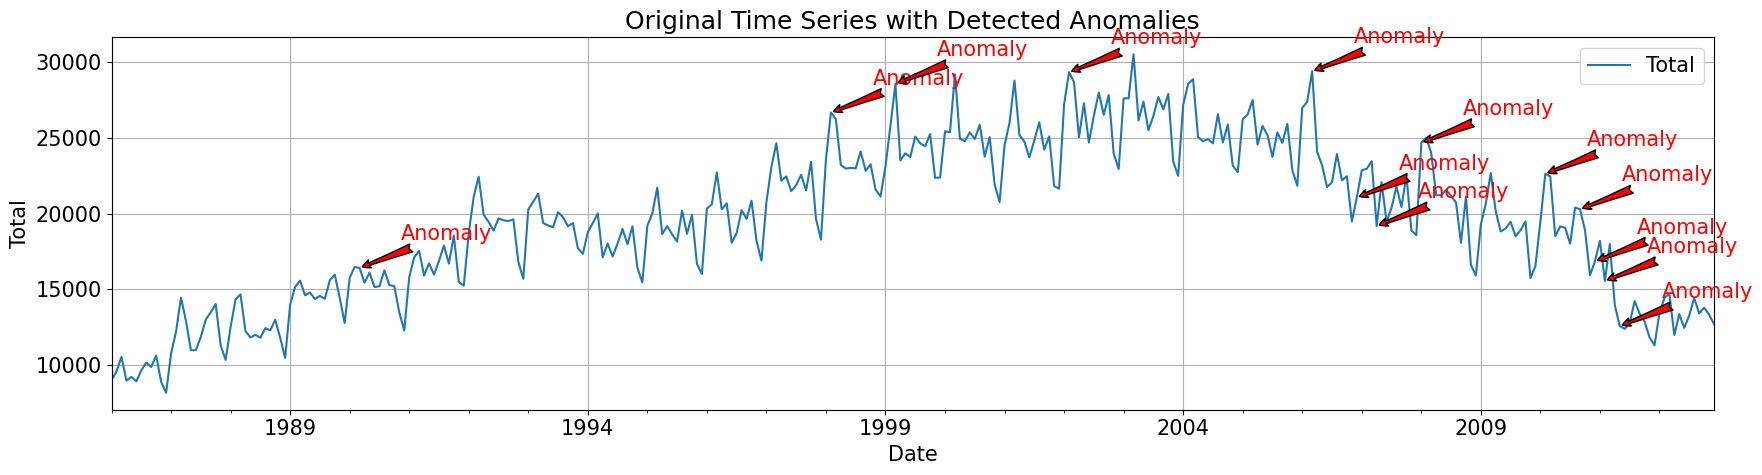

In [8]:
# ----------------------------
# 5. 원 시계열에서 이상치 주석 추가
# ----------------------------
plt.rc('figure', figsize=(18,5))
plt.rc('font', size=15)
ax = df.plot()

for i in range(len(y)):
    date = x[i]
    if y[i] < lower or y[i] > upper:
        ax.annotate(
            'Anomaly',
            (date, df.loc[date, 'Total']),
            xytext=(30, 20),
            textcoords='offset points',
            color='red',
            arrowprops=dict(facecolor='red', arrowstyle='fancy')
        )

plt.title("Original Time Series with Detected Anomalies")
plt.xlabel("Date")
plt.ylabel("Total")
plt.grid(True)
plt.tight_layout()
plt.show()